# KUIS 2 PEMBELAJARAN MESIN
Face Detection dan Face Recognition

- Diantoro Kadarman / 2241720084
- Habibatul Mustofa / 2241720211

# Intro

Pada kuis ini, Anda diminta untuk melakukan face detection dan face recognition pada wajah dengan menggunakan dataset primer (dataset wajah yang kalian kumpulkan sendiri).
Spesifikasi pengerjaan kuis yang harus dipehuni adalah,

1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection
2. Gunakan pre-trained model faceNet untuk face recognition
3. Gunakan model CNN untuk face recognition

# **1. Gunakan pre-trained model haarcascade_frontalface_default.xml untuk face detection**

Masukkan path gambar yang akan dideteksi: /content/drive/MyDrive/Tugas-Tugas/PBL - SMT 5/Machine Learning/Face-Dataset/Habib/ezgif-frame-001.jpg
Masukkan folder untuk menyimpan hasil crop wajah: /content/
Detecting faces...


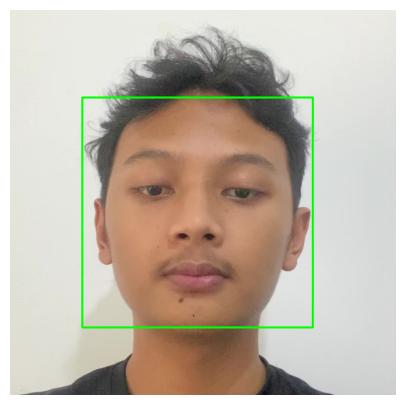

Deteksi selesai. Hasil disimpan di folder /content/.


In [ ]:
# Import libraries
import cv2
import os
import matplotlib.pyplot as plt

# Load Haarcascade for Face Detection
face_classifier = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Fungsi untuk face detection
def detect_faces(image_path, save_path):
    img = cv2.imread(image_path)
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(
        gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(40, 40)
    )
    os.makedirs(save_path, exist_ok=True)  # Buat folder untuk menyimpan hasil deteksi
    for i, (x, y, w, h) in enumerate(faces):
        cropped_face = img[y:y+h, x:x+w]
        cv2.imwrite(os.path.join(save_path, f"face_{i+1}.jpg"), cropped_face)
        cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)
    # Tampilkan hasil
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(10, 5))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Main program
if __name__ == "__main__":
    # Input gambar
    image_path = input("Masukkan path gambar yang akan dideteksi: ")
    save_path = input("Masukkan folder untuk menyimpan hasil crop wajah: ")

    # Jalankan face detection
    print("Detecting faces...")
    detect_faces(image_path, save_path)
    print(f"Deteksi selesai. Hasil disimpan di folder {save_path}.")


# **2. Gunakan pre-trained model faceNet untuk face recognition**

In [3]:
# 1. Instalasi modul yang diperlukan
# !pip install facenet-pytorch
# !pip install torch torchvision
!pip uninstall torch torchvision -y
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

Found existing installation: torch 2.2.2
Uninstalling torch-2.2.2:
  Successfully uninstalled torch-2.2.2
Found existing installation: torchvision 0.17.2
Uninstalling torchvision-0.17.2:
  Successfully uninstalled torchvision-0.17.2
Looking in indexes: https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 838.3/838.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 97.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.2/23.2 MB 68.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 875.6/875.6 kB 50.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 92.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.9/663.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.4/168.4 MB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 

In [1]:
import torch
from facenet_pytorch import InceptionResnetV1
print("PyTorch version:", torch.__version__)
print("Facenet-PyTorch successfully imported.")

PyTorch version: 2.5.1+cu118
Facenet-PyTorch successfully imported.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


  0%|          | 0.00/107M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/facenet_pytorch/models/inception_resnet_v1.py:329: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(cached_file)

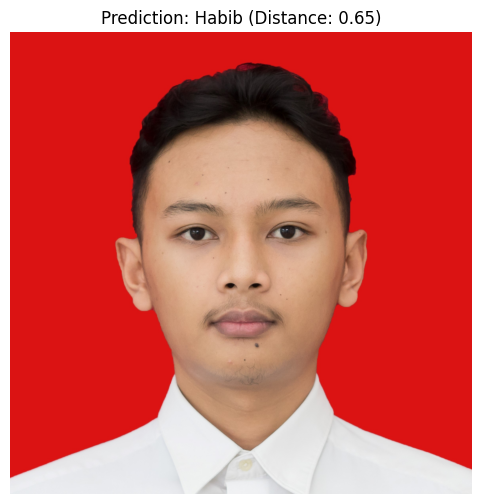

In [2]:
# 2. Import library
import os
import cv2
import numpy as np
from facenet_pytorch import InceptionResnetV1
import torch
import matplotlib.pyplot as plt

# 3. Inisialisasi perangkat (GPU/CPU)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 4. Inisialisasi model FaceNet (InceptionResnetV1)
model = InceptionResnetV1(pretrained='vggface2').eval().to(device)

# 5. Fungsi untuk memuat embedding dari dataset
def get_embeddings(dataset_path):
    embeddings = []
    labels = []

    for person_name in os.listdir(dataset_path):
        person_path = os.path.join(dataset_path, person_name)
        if not os.path.isdir(person_path):
            continue

        for image_name in os.listdir(person_path):
            image_path = os.path.join(person_path, image_name)
            img = cv2.imread(image_path)
            if img is None:
                print(f"Skipping invalid image: {image_path}")
                continue

            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (160, 160))
            img_tensor = torch.tensor(img_resized).permute(2, 0, 1).unsqueeze(0).float().to(device) / 255.0

            embedding = model(img_tensor).detach().cpu().numpy()
            embeddings.append(embedding)
            labels.append(person_name)

    return np.array(embeddings), np.array(labels)

# 6. Fungsi untuk mengenali wajah dan menambahkan teks pada gambar
def recognize_face(image_path, embeddings, labels):
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Resize gambar
    img_resized = cv2.resize(img_rgb, (160, 160))
    img_tensor = torch.tensor(img_resized).permute(2, 0, 1).unsqueeze(0).float().to(device) / 255.0

    # Ekstrak embedding gambar input
    face_embedding = model(img_tensor).detach().cpu().numpy()

    # Hitung jarak antara embedding input dengan dataset
    distances = np.linalg.norm(embeddings - face_embedding, axis=2)
    min_idx = np.argmin(distances)
    min_distance = distances[min_idx]

    # Ambang batas pengenalan
    if min_distance < 1.0:
        recognized_label = labels[min_idx]
    else:
        recognized_label = "Unknown"

    # Menampilkan gambar hasil prediksi tanpa teks di gambar
    plt.figure(figsize=(6, 6))
    plt.imshow(img_rgb)
    plt.axis('off')  # Menghilangkan axis
    plt.title(f"Prediction: {recognized_label} (Distance: {min_distance[0]:.2f})")  # Menambahkan distance di judul
    plt.show()

# 7. Muat dataset dan tes pengenalan wajah
dataset_path = '/content/drive/MyDrive/Tugas-Tugas/PBL - SMT 5/Machine Learning/Face-Dataset'  # Ubah ke path dataset Anda
embeddings, labels = get_embeddings(dataset_path)

test_image_path = '/content/Foto_Habibatul Mustofa.jpg'  # Ubah ke path gambar uji Anda
recognize_face(test_image_path, embeddings, labels)

# **3. Gunakan model CNN untuk face recognition**

Found 741 images belonging to 6 classes.
Found 185 images belonging to 6 classes.
Class Names: ['Afrizal', 'Dennis', 'Diantoro', 'Dido', 'Habib', 'Paksi']
Class Weights: {0: 0.8821428571428571, 1: 1.0206611570247934, 2: 1.0291666666666666, 3: 1.0291666666666666, 4: 0.771875, 5: 1.54375}
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


23/23 ━━━━━━━━━━━━━━━━━━━━ 28s 770ms/step - accuracy: 0.2079 - loss: 2.3580 - val_accuracy: 0.7750 - val_loss: 0.9660 - learning_rate: 1.0000e-04
Epoch 2/20
 1/23 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6250 - loss: 1.1914

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - accuracy: 0.6250 - loss: 1.1914 - val_accuracy: 0.7600 - val_loss: 0.9453 - learning_rate: 1.0000e-04
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 14s 517ms/step - accuracy: 0.6035 - loss: 1.0108 - val_accuracy: 0.9125 - val_loss: 0.5540 - learning_rate: 1.0000e-04
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.8750 - loss: 0.5771 - val_accuracy: 0.9200 - val_loss: 0.5135 - learning_rate: 1.0000e-04
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 19s 497ms/step - accuracy: 0.7916 - loss: 0.6544 - val_accuracy: 0.9688 - val_loss: 0.3222 - learning_rate: 1.0000e-04
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8438 - loss: 0.4106 - val_accuracy: 0.9600 - val_loss: 0.3549 - learning_rate: 1.0000e-04
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 17s 538ms/step - accuracy: 0.9074 - loss: 0.3683 - val_accuracy: 0.9937 - val_loss: 0.2006 - learning_rate: 1.0000e-04
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9375 - l

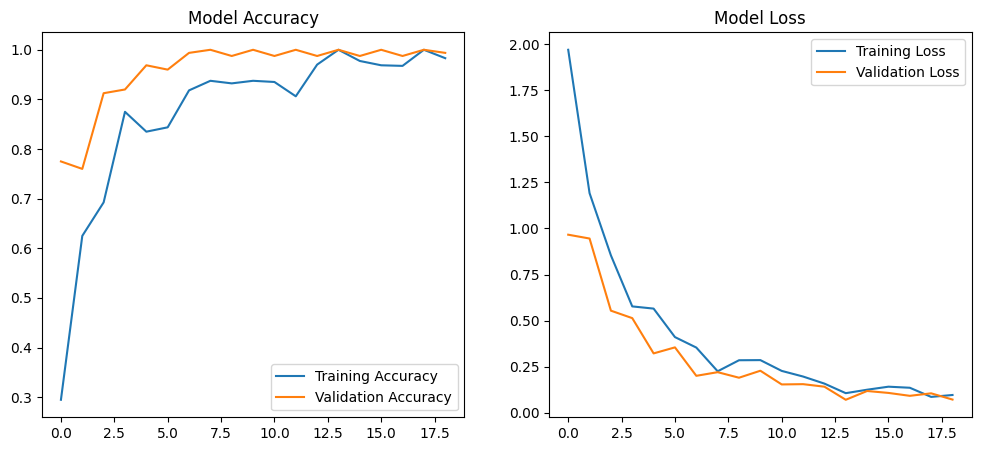

In [1]:
# Import library
import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from google.colab import files
from tensorflow.keras.applications import MobileNet

# Path dataset
data_path = '/content/drive/MyDrive/Tugas-Tugas/PBL - SMT 5/Machine Learning/Face-Dataset'

# Data Augmentation untuk mengurangi overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

# Generator data untuk training dan validation
train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    seed=42
)

# Mendapatkan jumlah kelas dan nama kelas
num_classes = train_generator.num_classes
class_names = list(train_generator.class_indices.keys())
print("Class Names:", class_names)

# Hitung class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.arange(num_classes),
    y=np.concatenate([train_generator.classes])
)
class_weights = dict(enumerate(class_weights))
print("Class Weights:", class_weights)

# Membangun model dengan MobileNet
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze layer pre-trained

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callback untuk early stopping dan reduce learning rate
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping, reduce_lr],
    class_weight=class_weights
)

# Evaluasi model
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Final Validation Loss: {loss}")
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")

# Visualisasi hasil pelatihan
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()

In [2]:
# Evaluasi model
loss, accuracy = model.evaluate(validation_generator, verbose=1)
print(f"Final Validation Loss: {loss}")
print(f"Final Validation Accuracy: {accuracy * 100:.2f}%")

6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 442ms/step - accuracy: 0.9816 - loss: 0.1381
Final Validation Loss: 0.13392364978790283
Final Validation Accuracy: 97.84%


In [3]:
# Simpan model
model_save_path = '/content/drive/MyDrive/Tugas-Tugas/PBL - SMT 5/Machine Learning/Quiz_2_Model.h5'
model.save(model_save_path)
print(f"Model telah disimpan ke: {model_save_path}")

Model telah disimpan ke: /content/drive/MyDrive/Tugas-Tugas/PBL - SMT 5/Machine Learning/Quiz_2_Model.h5


Silakan unggah gambar:


Saving WhatsApp Image 2024-12-05 at 14.23.25_8181ff81.jpg to WhatsApp Image 2024-12-05 at 14.23.25_8181ff81.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Gambar: WhatsApp Image 2024-12-05 at 14.23.25_8181ff81.jpg
Prediksi: Diantoro (Confidence: 51.93%)


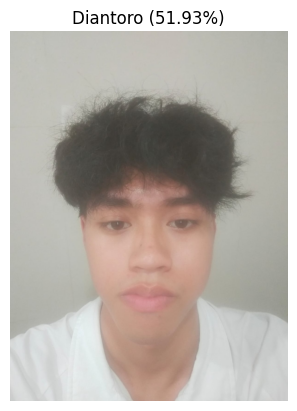

In [6]:
# Fungsi untuk prediksi gambar
def predict_leaf(image_path, model, class_names, threshold=0.5):
    img = tf.keras.utils.load_img(image_path, target_size=(128, 128))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    predictions = model.predict(img_array)
    confidence = np.max(predictions)
    predicted_class = class_names[np.argmax(predictions)]

    if confidence < threshold:
        return "Tidak Terdeteksi", confidence

    return predicted_class, confidence

# Tes prediksi gambar
print("Silakan unggah gambar:")
uploaded = files.upload()

# Proses setiap gambar yang diunggah
for image_path in uploaded.keys():
    predicted_class, confidence = predict_leaf(image_path, model, class_names)
    print(f"\nGambar: {image_path}")
    print(f"Prediksi: {predicted_class} (Confidence: {confidence * 100:.2f}%)")
    img = plt.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"{predicted_class} ({confidence * 100:.2f}%)")
    plt.show()